In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.metrics import silhouette_score

In [19]:
# Load dataset
df = pd.read_csv('sales_data_sample.csv', encoding='unicode_escape')

In [20]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [22]:
# Drop unnecessary columns
to_drop = ['ADDRESSLINE1', 'ADDRESSLINE2', 'STATE', 'POSTALCODE', 'PHONE']
df = df.drop(to_drop, axis=1)

In [23]:
#Check for null values
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
CITY                   0
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [24]:
df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
CITY                 object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

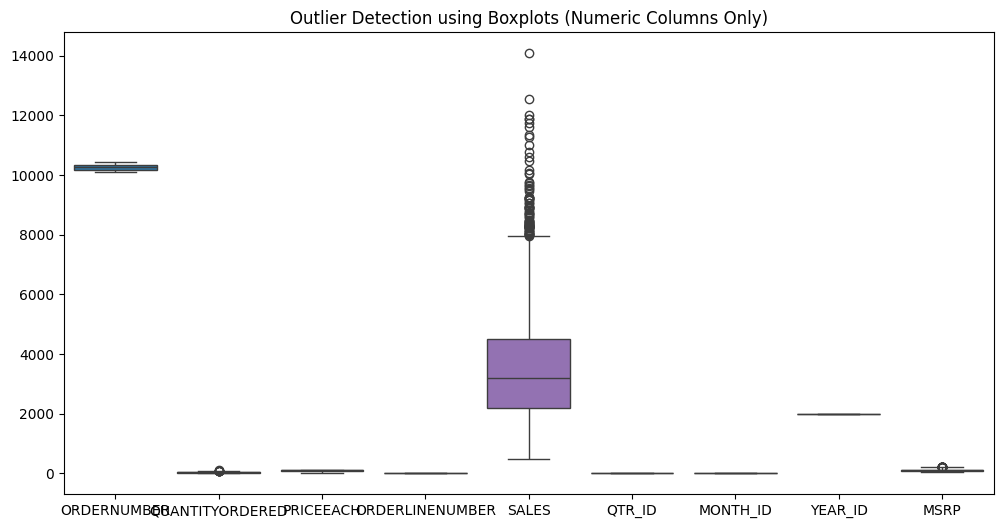


Number of Outliers per Numeric Feature:
 ORDERNUMBER         0
QUANTITYORDERED     8
PRICEEACH           0
ORDERLINENUMBER     0
SALES              81
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
MSRP               28
dtype: int64


In [25]:
# Select numeric columns only
df_numeric = df.select_dtypes(include=['int64', 'float64'])

# Visualize outliers
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_numeric)
plt.title("Outlier Detection using Boxplots (Numeric Columns Only)")
plt.show()

# Identify outliers using IQR
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

# Count outliers per column
outliers = ((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).sum()
print("\nNumber of Outliers per Numeric Feature:\n", outliers)


In [26]:
from sklearn.preprocessing import StandardScaler

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_df)

print("Data normalized using StandardScaler.")


Data normalized using StandardScaler.


In [27]:
df_normalized = pd.DataFrame(X_scaled, columns=numeric_df.columns)
print("\nSample of Normalized Data:")
display(df_normalized.head())



Sample of Normalized Data:


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
0,-1.647947,-0.522891,0.596978,-1.057059,-0.370825,-1.427039,-1.392909,-1.16517,-0.142246
1,-1.495888,-0.112201,-0.114450,-0.347015,-0.427897,-0.596243,-0.572337,-1.16517,-0.142246
2,-1.354689,0.606505,0.549384,-1.057059,0.179443,0.234553,-0.025289,-1.16517,-0.142246
3,-1.235214,1.017195,-0.019759,-0.110334,0.104701,0.234553,0.248235,-1.16517,-0.142246
4,-1.083154,1.427884,0.810158,1.783116,0.896740,1.065350,0.795284,-1.16517,-0.142246


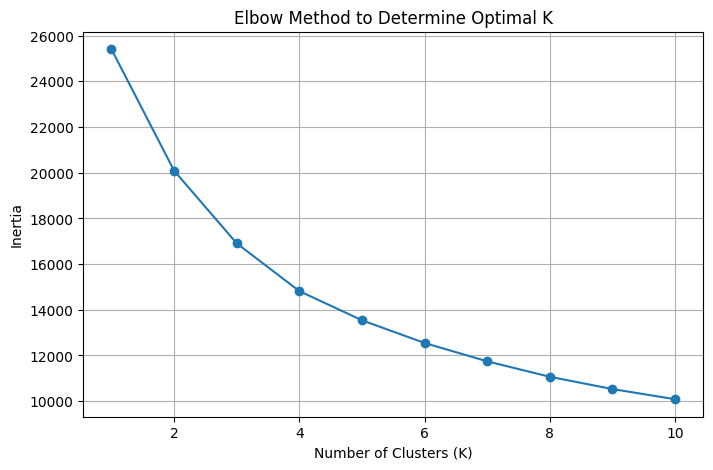

In [28]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.title("Elbow Method to Determine Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


In [29]:
from sklearn.metrics import silhouette_score

for k in range (2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    sil_score = silhouette_score(X_scaled, labels)
    print(f"K = {k} → Silhouette Score = {sil_score:.4f}")

K = 2 → Silhouette Score = 0.2169
K = 3 → Silhouette Score = 0.1960
K = 4 → Silhouette Score = 0.2059
K = 5 → Silhouette Score = 0.1872
K = 6 → Silhouette Score = 0.1949
K = 7 → Silhouette Score = 0.1922
K = 8 → Silhouette Score = 0.1837
K = 9 → Silhouette Score = 0.1832
K = 10 → Silhouette Score = 0.1842


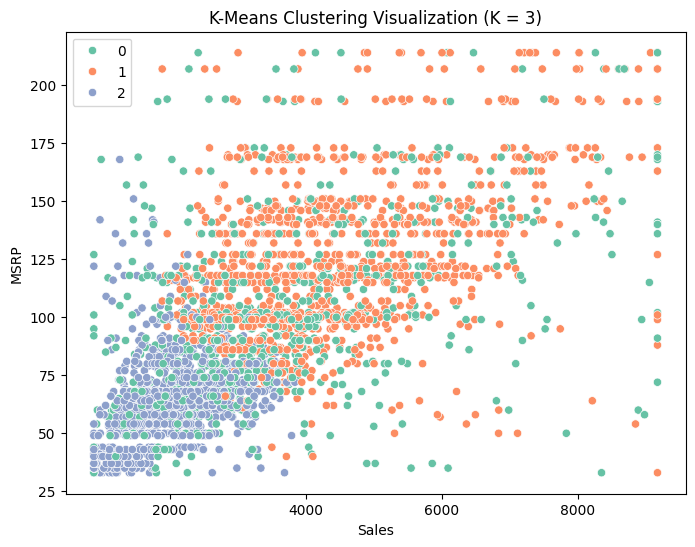

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

df_capped = df.copy()
df_capped['SALES'] = df['SALES'].clip(lower=df['SALES'].quantile(0.01),
                                      upper=df['SALES'].quantile(0.99))

# Scale numeric features
numeric_df = df_capped.select_dtypes(include=['number'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_df)

# Run K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Visualize clusters
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df_capped['SALES'],
    y=df_capped['MSRP'],
    hue=labels,
    palette='Set2'
)
plt.title("K-Means Clustering Visualization (K = 3)")
plt.xlabel("Sales")
plt.ylabel("MSRP")
plt.show()
